Tried making this into an api with

#Reverse Image Search

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

We will classify image contents utilizing Convolutional Neural Networks (CNNs) pre-trained on the ImageNet dataset.

In [ ]:
# import the necessary packages
import torch
from torch import nn
import torchvision
from torchvision import models, transforms

import numpy as np
import argparse
from PIL import Image
import json
import pickle
import urllib.request as urllib2

Size parameters for image

In [ ]:
# Setting the hyper-params
image_size = 224
image_size=(image_size, image_size)a
image_path = './test_images/American_Beaver.jpg'

In [ ]:
mappings = pickle.load(urllib2.urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl') )

Transform Variable represents a sequence of three transformations applied to an input image:

*  Resize the image to a specified size (image_size).
*   Convert the resized image into a PyTorch tensor.
*   Normalize the tensor's pixel values using mean and standard deviation values.










In [ ]:
transform = transforms.Compose([
     transforms.Resize(image_size),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

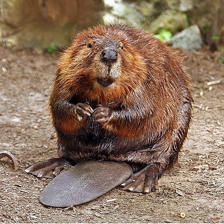

In [ ]:
image=Image.open(image_path).resize(image_size)
image

Now we takes an image, applies some transformation using the transform function, and then converts it into a 4D tensor with an additional batch dimension.

In [ ]:
img_t = transform(image)
image = torch.unsqueeze(img_t, 0)
image.shape

torch.Size([1, 3, 224, 224])

## Using Resnet
ResNet (short for Residual Network) is a deep convolutional neural network architecture that was introduced by researchers Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their 2015 paper titled "Deep Residual Learning for Image Recognition." ResNet is one of the pioneering architectures in the field of computer vision and has had a significant impact on the development of deep learning models.


Advantages:
 ResNet's skip connections and residual blocks make it a powerful and effective architecture for training very deep neural networks. By mitigating the vanishing gradient problem, ResNet allows for the development of deeper models that can capture more complex features, leading to improved performance on various computer vision tasks.

In [ ]:
# First, load the model
resnet = models.resnet50(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 125MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Carry out model inference
out = resnet(image)

# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(mappings[idx.item()], percentage[idx].item()) for idx in indices[0][:5]]

[('beaver', 99.5400161743164),
 ('marmot', 0.33884063363075256),
 ('otter', 0.07706280052661896),
 ('mink', 0.024355493485927582),
 ('brown bear, bruin, Ursus arctos', 0.0030518509447574615)]

In [ ]:
mappings[indices[0][0].item()]

'beaver'

#More Tests


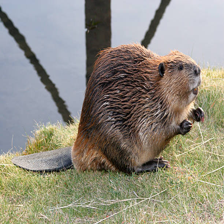

In [ ]:
image_test_1 =  Image.open("./test_images/beaver_side.jpg").resize(image_size)
image_test_1

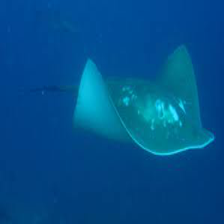

In [ ]:
image_test_2 =  Image.open("./test_images/stingray.jpeg").resize(image_size)
image_test_2

#Make the model into a callable function

In [ ]:
def image_Identifier(image):
  # Carry out model inference
  img_t_func = transform(image)
  image_func = torch.unsqueeze(img_t, 0)
  image_func.shape
  out = resnet(image_func)

  _, indices = torch.sort(out, descending=True)
  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  [(mappings[idx.item()], percentage[idx].item()) for idx in indices[0][:5]]
  return mappings[indices[0][0].item()]

In [ ]:
image_Identifier(image_test_2)

'electric ray, crampfish, numbfish, torpedo'

In [ ]:
image_Identifier(image_test_1)

'beaver'

Exporting the model to ad in an api

In [ ]:
import torch
import torchvision.models as models

# Assuming you have a trained ResNet model
resnet_model = models.resnet50(pretrained=True)

# Save the model's state_dict (weights only)
torch.save(resnet_model.state_dict(), 'resnet_model_state_dict.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import pickle
import urllib.request as urllib2

# Save the class mappings to a pickle file
mappings = pickle.load(urllib2.urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'))
with open('class_mappings.pkl', 'wb') as f:
    pickle.dump(mappings, f)


If resnet model cant be downloaded directly

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
torch.save(resnet_model.state_dict(), '/content/drive/MyDrive/resnet_model_state_dict.pth')


Mounted at /content/drive
